# yfinance란?

[yfinance](https://pypi.org/project/yfinance/)는 랜 애루시(Ran Aroussi)가 개발한 오픈 소스 라이브러리입니다. 이 라이브러리는 [야후 파이낸스(Yahoo! Finance)](https://finance.yahoo.com/)를 통해 금융 데이터를 액세스할 수 있도록 만들어졌습니다. 야후 파이낸스는 주식, 채권, 통화 및 암호화폐에 대한 광범위한 시장 데이터를 제공하고 있습니다.

yfinance 패키지 설치

In [1]:
!pip install yfinance --quiet

You should consider upgrading via the '/Users/byobyo/anaconda3/bin/python -m pip install --upgrade pip' command.


In [24]:
# yfinace에서 데이터를 불러오는 과정에서 key encryption 문제가 있습니다.
!pip install yahooquery --quiet

You should consider upgrading via the '/Users/byobyo/anaconda3/bin/python -m pip install --upgrade pip' command.


# yfinance의 기본구조

In [2]:
import yfinance as yf

In [25]:
import yahooquery as yq

### 티커 객체 정의하기

`yfinance`를 사용하기 위해서는 먼저 티커를 선택하고 이를 객체화하는 작업이 필요합니다. 티커(Ticker)란 금융시장에서 특정 종목을 표현하는 약자를 의미합니다. 가령 애플의 경우 주식시장에서 'AAPL'이라는 티커를 가지고 있고, 마이크로소프트의 경우 'MSFT'라는 티커를 가지고 있습니다. 이 티커는 당연히 각 종목별로 고유한 값입니다. `yfinance`에서는 티커를 객체화하기 위해 `Ticker()`라는 메서드를 사용하고 있습니다. 여기서는 간단하게 애플의 티커 객체를 구현해보겠습니다.

In [30]:
aapl = yf.Ticker('AAPL')
print(aapl)

yfinance.Ticker object <AAPL>


In [26]:
aapl = yq.Ticker('AAPL')
print(aapl)

### 종목 기본정보

이제 티커를 정의했으니 해당 종목이 어떤 종목인지 기본적인 정보를 출력해보겠습니다. 티커 객체는 `info`라는 속성(Attribute)을 가지고 있습니다. 이를 활용하면 종목에 대한 세세한 정보를 얻을 수 있습니다. 

In [ ]:
aapl.info

### 시장 데이터 다운로드

종목의 과거 가격 및 거래량에 대한 데이터를 다운받기 위해서는 `history()`라는 메서드를 사용하면 됩니다. 이 메서드는 단일 종목 혹은 여러 종목들에 대한 시장 데이터를 가져와 우리에게 전달해주는 역할을 하고 있습니다.

우선 가장 단순하게 구현을 하기 위해 애플 주식의 가능한 한 많은 일별 데이터를 가져와보도록 하겠습니다.

In [28]:
data = aapl.history(period='max')
data

open        high         low       close     volume  \
symbol date                                                                    
AAPL   1980-12-12    0.128348    0.128906    0.128348    0.128348  469033600   
       1980-12-15    0.122210    0.122210    0.121652    0.121652  175884800   
       1980-12-16    0.113281    0.113281    0.112723    0.112723  105728000   
       1980-12-17    0.115513    0.116071    0.115513    0.115513   86441600   
       1980-12-18    0.118862    0.119420    0.118862    0.118862   73449600   
...                       ...         ...         ...         ...        ...   
       2023-10-16  176.750000  179.080002  176.509995  178.720001   52517000   
       2023-10-17  176.649994  178.419998  174.800003  177.149994   57549400   
       2023-10-18  175.580002  177.580002  175.110001  175.839996   54764400   
       2023-10-19  176.039993  177.839996  175.190002  175.460007   59302900   
       2023-10-20  175.309998  175.419998  172.639999  172.880005   64189300   

                     adjclose  dividends  splits  
symbol date                                       
AAPL   1980-12-12    0.099450        0.0     0.0  
       1980-12-15    0.094261        0.0     0.0  
       1980-12-16    0.087343        0.0     0.0  
       1980-12-17    0.089504        0.0     0.0  
       1980-12-18    0.092099        0.0     0.0  
...                       ...        ...     ...  
       2023-10-16  178.720001        0.0     0.0  
       2023-10-17  177.149994        0.0     0.0  
       2023-10-18  175.839996        0.0     0.0  
       2023-10-19  175.460007        0.0     0.0  
       2023-10-20  172.880005        0.0     0.0  

[10805 rows x 8 columns]

애플 주식에 대한 과거 데이터가 잘 들어오는 것을 확인할 수 있습니다. 간단히 종가를 기준으로 가격 그래프를 만들어보겠습니다. 앞으로 우리는 이 `history()` 메서드를 사용하여 여러 ETF들에 대한 과거 데이터를 다운받아 사용할 것입니다.

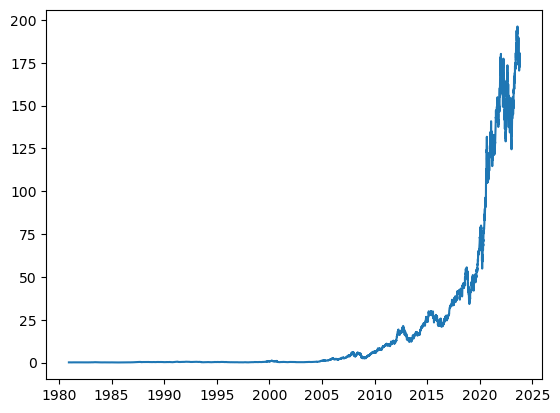

In [11]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])

`history()` 메서드는 몇 가지 인자를 받아 이에 맞게 데이터 쿼리 작업을 처리할 수 있습니다. 아래는 `history()` 메서드가 가지고 있는 인자(Parameter)와 이에 대한 설명입니다.


- `period` : 데이터를 다운받을 기간을 설정합니다. 기본값은 한달(`1mo`)입니다. (`1d`, `5d`, `1mo`, `3mo`, `6mo`, `1y`, `2y`, `5y`, `10y`, `ytd`, `max`)
- `interval` : 데이터의 주기를 설정합니다. 주기를 일별보다 낮은 장중으로 설정할 경우 최대 60일간의 데이터만 제공합니다. 기본값은 하루(`1d`)입니다. (`1m`, `2m`, `5m`, `15m`, `30m`, `60m`, `90m`, `1h`, `1d`, `5d`, `1wk`, `1mo`, `3mo`)
- `start` : `period` 인자를 사용하지 않을 경우 데이터의 시작일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `end` : `period` 인자를 사용하지 않을 경우 데이터의 종료일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `prepost` : 시간외거래의 데이터를 결과에 포함시킬것인지를 설정합니다. 기본값은 `False`입니다.
- `auto_adjust` : 자동으로 수정주가를 사용할 것인지를 설정합니다. 기본값은 `True`입니다.
- `actions` : 주식의 경우 배당이나 주식 분할 같은 기업공시 이벤트를 다운받을지를 설정합니다. 기본값은 `True`입니다.

In [12]:
data = aapl.history(start='2015-01-01', end='2022-03-11', actions=False)
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-04 00:00:00-05:00,163.053567,164.104308,160.684439,161.745087,83737200
2022-03-07 00:00:00-05:00,161.933401,163.578909,157.651120,157.908859,96418800
2022-03-08 00:00:00-05:00,157.433078,161.457621,154.439447,156.065125,131148300
2022-03-09 00:00:00-05:00,160.069844,161.982998,158.017928,161.527008,91454900
2022-03-10 00:00:00-05:00,158.801018,158.989361,154.617869,157.135696,105342000


<Axes: xlabel='Date'>

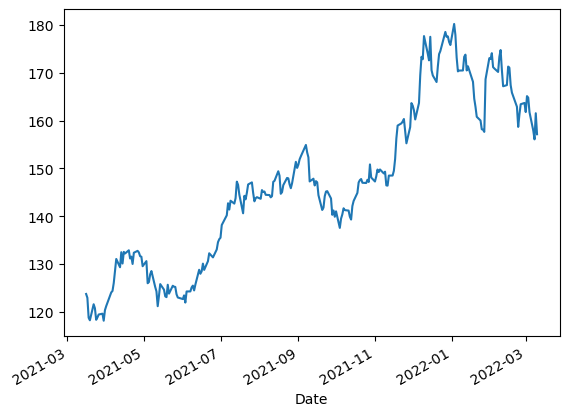

In [13]:
data['Close'].iloc[-250:].plot()

### 기타 데이터 다운로드

`yfinance`는 가격 데이터 뿐만 아니라 재무 데이터, 대주주 보유 현황, 애널리스트 의견, 뉴스 데이터 또한 제공합니다. 아래의 리스트는 `yfinance`를 통해 얻을 수 있는 주요 데이터를 가져올 수 있는 속성값들입니다.

- `financials` : 연도별 재무제표
- `quarterly_financials` : 분기별 재무제표
- `balance_sheet` : 연도별 대차대조표
- `quarterly_balance_sheet` : 분기별 대차대조표
- `cashflow` : 연도별 현금흐름표
- `quaterly_cashflow` : 분기별 현금흐름표
- `earnings` : 연도별 실적
- `quarterly_earnings` : 분기별 실적
- `institutional_holders` : 주요 기관 대주주 보유현황
- `recommendations` : 애널리스트 의견
- `news` : 최근 뉴스

In [ ]:
# 연도별 재무제표
aapl.financials

In [15]:
# 분기별 재무제표
aapl.quarterly_financials

,2023-06-30,2023-03-31,2022-12-31,2022-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.125456,0.148756,0.157904,0.15963
Normalized EBITDA,26050000000.0,31216000000.0,38932000000.0,27759000000.0
Net Income From Continuing Operation Net Minority Interest,19881000000.0,24160000000.0,29998000000.0,20721000000.0
Reconciled Depreciation,3052000000.0,2898000000.0,2916000000.0,2865000000.0
Reconciled Cost Of Revenue,45384000000.0,52860000000.0,66822000000.0,52051000000.0
EBITDA,26050000000.0,31216000000.0,38932000000.0,27759000000.0
EBIT,22998000000.0,28318000000.0,36016000000.0,24894000000.0
Net Interest Income,-18000000.0,-12000000.0,-135000000.0,-74000000.0
Interest Expense,998000000.0,930000000.0,1003000000.0,827000000.0


In [ ]:
# 연도별 대차대조표
aapl.balance_sheet

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11
Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11
Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10
Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11
Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10
Other Current Assets,1.411100e+10,1.126400e+10,1.235200e+10,1.208700e+10
Retained Earnings,5.562000e+09,1.496600e+10,4.589800e+10,7.040000e+10
Other Liab,4.305000e+10,4.610800e+10,5.050300e+10,4.891400e+10
Gains Losses Not Affecting Retained Earnings,1.630000e+08,-4.060000e+08,-5.840000e+08,-3.454000e+09
Other Assets,3.876200e+10,3.395200e+10,3.297800e+10,2.228300e+10


In [16]:
# 분기별 대차대조표
aapl.quarterly_balance_sheet

,2023-06-30,2023-03-31,2022-12-31,2022-09-30
Ordinary Shares Number,15647868000.0,15723406000.0,15842407000.0,15943425000.0
Share Issued,15647868000.0,15723406000.0,15842407000.0,15943425000.0
Net Debt,80872000000.0,84928000000.0,90575000000.0,96423000000.0
Total Debt,109280000000.0,109615000000.0,111110000000.0,120069000000.0
Tangible Book Value,60274000000.0,62158000000.0,56727000000.0,50672000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,62482000000.0,55872000000.0,51355000000.0,48304000000.0
Other Short Term Investments,34074000000.0,31185000000.0,30820000000.0,24658000000.0
Cash And Cash Equivalents,28408000000.0,24687000000.0,20535000000.0,23646000000.0
Cash Equivalents,3071000000.0,4637000000.0,2627000000.0,5100000000.0


In [17]:
# 연도별 현금흐름표
aapl.cashflow

,2022-09-30,2021-09-30,2020-09-30
Free Cash Flow,111443000000.0,92953000000.0,73365000000.0
Repurchase Of Capital Stock,-89402000000.0,-85971000000.0,-72358000000.0
Repayment Of Debt,-9543000000.0,-8750000000.0,-13592000000.0
Issuance Of Debt,9420000000.0,20393000000.0,16091000000.0
Issuance Of Capital Stock,NaN,1105000000.0,880000000.0
Capital Expenditure,-10708000000.0,-11085000000.0,-7309000000.0
Interest Paid Supplemental Data,2865000000.0,2687000000.0,3002000000.0
Income Tax Paid Supplemental Data,19573000000.0,25385000000.0,9501000000.0
End Cash Position,24977000000.0,35929000000.0,39789000000.0
Beginning Cash Position,35929000000.0,39789000000.0,50224000000.0


In [18]:
# 분기별 현금흐름표
aapl.quarterly_cashflow

,2023-06-30,2023-03-31,2022-12-31,2022-09-30
Free Cash Flow,24287000000.0,25644000000.0,30218000000.0,20838000000.0
Repurchase Of Capital Stock,-17478000000.0,-19594000000.0,-19475000000.0,-24428000000.0
Repayment Of Debt,-7500000000.0,5964000000.0,-9615000000.0,-2793000000.0
Issuance Of Debt,NaN,NaN,NaN,4450000000.0
Capital Expenditure,-2093000000.0,-2916000000.0,-3787000000.0,-3289000000.0
Interest Paid Supplemental Data,717000000.0,1170000000.0,703000000.0,955000000.0
Income Tax Paid Supplemental Data,2126000000.0,4066000000.0,828000000.0,7322000000.0
End Cash Position,29898000000.0,27129000000.0,21974000000.0,24977000000.0
Beginning Cash Position,27129000000.0,21974000000.0,24977000000.0,28861000000.0
Changes In Cash,2769000000.0,5155000000.0,-3003000000.0,-3884000000.0


In [ ]:
# 연도별 실적
aapl.earnings

In [ ]:
# 분기별 실적
aapl.quarterly_earnings

In [21]:
# 주요 기관 보유현황
aapl.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Group Inc,1303688506,2023-06-29,0.0834,225381675282
1,Blackrock Inc.,1039640859,2023-06-29,0.0665,179733116780
2,"Berkshire Hathaway, Inc",915560382,2023-06-29,0.0586,158282083310
3,State Street Corporation,578897858,2023-06-29,0.0370,100079864517
4,"FMR, LLC",307066638,2023-06-29,0.0196,53085681876
5,"Geode Capital Management, LLC",291538165,2023-06-29,0.0186,50401119388
6,Price (T.Rowe) Associates Inc,226650943,2023-06-29,0.0145,39183416132
7,Morgan Stanley,204714950,2023-06-29,0.0131,35391121555
8,Norges Bank Investment Management,167374278,2022-12-30,0.0107,28935665997
9,Northern Trust Corporation,164536073,2023-06-29,0.0105,28444997103


In [ ]:
# 애널리스트 의견
aapl.recommendations[aapl.recommendations['Firm'] == 'Morgan Stanley']

In [32]:
# 최근 뉴스
aapl.news

[{'uuid': '80f4df88-dbdc-3940-bc3a-a04222d6afc3',
  'title': 'Tim Cook Can’t Make iPhones Without This Chinese Company and Its CEO',
  'publisher': 'The Wall Street Journal',
  'link': 'https://finance.yahoo.com/m/80f4df88-dbdc-3940-bc3a-a04222d6afc3/tim-cook-can%E2%80%99t-make-iphones.html',
  'providerPublishTime': 1698033660,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/lty1nJ2.Cn.Yz9R2PVDGYg--~B/aD02NDA7dz0xMjgwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/wsj.com/ff9062ae06982c7a9efa144622408e48',
     'width': 1280,
     'height': 640,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/wzYAqQAzJLQENbRjlRvsvg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/wsj.com/ff9062ae06982c7a9efa144622408e48',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['002475.SZ', 'FXCOF', 'AAPL']},
 {'uuid': '371a5aab-bb67-3855-9939-c200bf5ff14f',
  'titl

# yfinance로 ETF 가격 데이터 다운로드하기

### 여러 종목 데이터 한꺼번에 받기

지금까지는 단일 종목에 대한 데이터 쿼리에 대해서만 다루었습니다. 그런데 만약  여러 종목들에 대한 데이터를 한꺼번에 받고 싶다면 어떻게 해야할까요? 이런 경우에도 방법은 똑같습니다. 다만 여러 종목들에 대한 티커 객체를 만들고자 한다면 `Ticker()` 메서드가 아닌 `Tickers()` 메서드를 사용해야 합니다. SPY와 TLT, 두 가지 ETF의 가격 데이터를 다운로드해보겠습니다. SPY는 S&P 500 지수를 추종하는 ETF이며, TLT는 미국 장기채를 추종하는 ETF입니다. 각각 미국 주식과 미국 채권을 대표하는 ETF라고 할 수 있습니다.

In [33]:
tickers = ['SPY', 'TLT']

etf = yf.Tickers(tickers)

data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%%**********************]  2 of 2 completed


Close                   High                    Low  \
                   SPY        TLT         SPY        TLT         SPY   
Date                                                                   
2002-08-01   59.265274  40.975021   60.980883  40.984893   58.964878   
2002-08-02   57.936836  41.394650   59.352048  41.518068   57.155802   
2002-08-05   55.920815  41.577286   58.030281  41.685895   55.773957   
2002-08-06   57.803299  41.221844   58.677795  41.419314   56.815325   
2002-08-07   58.811295  41.320568   59.078316  41.537786   57.255898   
...                ...        ...         ...        ...         ...   
2023-10-16  436.040009  86.199997  437.140015  86.370003  433.570007   
2023-10-17  436.019989  85.250000  438.140015  85.629997  432.450012   
2023-10-18  430.209991  84.500000  435.179993  84.720001  429.089996   
2023-10-19  426.429993  82.769997  432.820007  84.570000  425.730011   
2023-10-20  421.190002  83.239998  426.540009  83.540001  421.079987   

                             Open                Volume            
                  TLT         SPY        TLT        SPY       TLT  
Date                                                               
2002-08-01  40.747931   60.667132  40.747931   66571900     25000  
2002-08-02  40.915784   59.078350  41.054016   51772900     52800  
2002-08-05  41.394625   57.736556  41.488424   47191300     61100  
2002-08-06  41.083615   56.895433  41.404505   64730000     64900  
2002-08-07  41.152721   58.657761  41.271201   43289400     40300  
...               ...         ...        ...        ...       ...  
2023-10-16  85.900002  433.820007  86.190002   75433200  38309800  
2023-10-17  84.500000  432.809998  84.889999   75324700  52949100  
2023-10-18  83.849998  434.190002  84.379997   93559800  63724600  
2023-10-19  82.739998  430.950012  83.879997  121323000  87696900  
2023-10-20  82.769997  425.980011  82.989998  123845800  52162600  

[5343 rows x 10 columns]

각각의 ETF에 대해 OHLCV 데이터가 들어오는 것을 확인할 수 있습니다. 만약 종가 데이터만 필요하다면 판다스 데이터프레임의 [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)과 [`droplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) 메서드를 사용해 데이터를 축약할 수 있습니다.

In [34]:
data.drop(['Open', 'Low', 'High', 'Volume'], inplace=True, axis=1)
data

Close           
                   SPY        TLT
Date                             
2002-08-01   59.265274  40.975021
2002-08-02   57.936836  41.394650
2002-08-05   55.920815  41.577286
2002-08-06   57.803299  41.221844
2002-08-07   58.811295  41.320568
...                ...        ...
2023-10-16  436.040009  86.199997
2023-10-17  436.019989  85.250000
2023-10-18  430.209991  84.500000
2023-10-19  426.429993  82.769997
2023-10-20  421.190002  83.239998

[5343 rows x 2 columns]

In [35]:
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.265274,40.975021
2002-08-02,57.936836,41.394650
2002-08-05,55.920815,41.577286
2002-08-06,57.803299,41.221844
2002-08-07,58.811295,41.320568
...,...,...
2023-10-16,436.040009,86.199997
2023-10-17,436.019989,85.250000
2023-10-18,430.209991,84.500000


<Axes: xlabel='Date'>

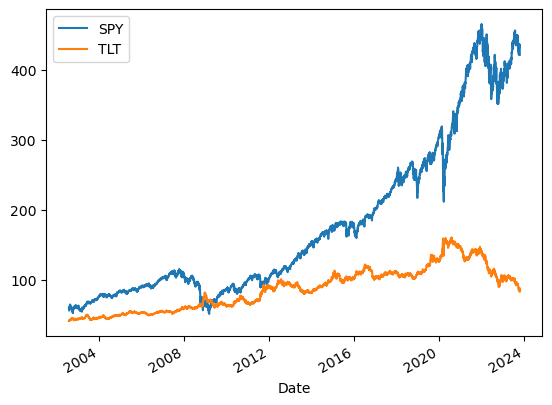

In [36]:
data.plot()

### 입력변수: 수익률, 변동성, 상관계수

#### 1. 수익률

Text(0, 0.5, 'Returns')

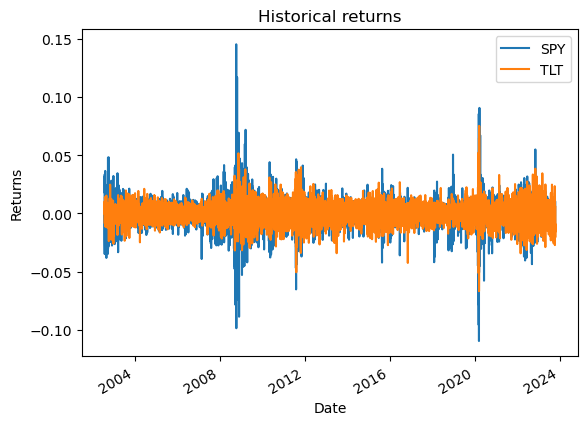

In [37]:
# 수익률 계산
rets = data.pct_change().fillna(0)

# 수익률 데이터 확인
rets.head()

# 수익률 데이터 시각화
rets.plot()
plt.title('Historical returns')
plt.xlabel('Date')
plt.ylabel('Returns')

#### 2. 변동성

In [38]:
import numpy as np

Text(0, 0.5, 'Vols')

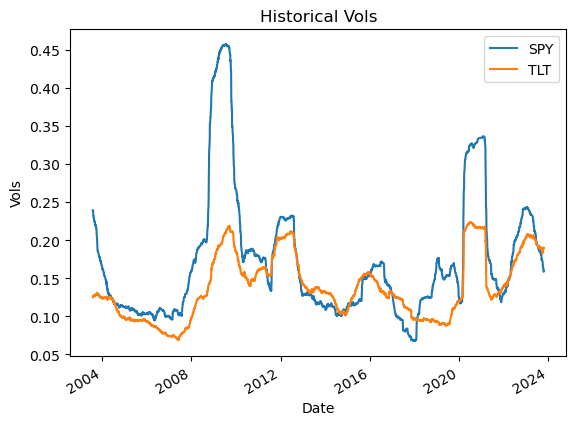

In [39]:
# 전체 기간 변동성 계산
total_vols = rets.std() * np.sqrt(252)
total_vols

# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(252).std() * np.sqrt(252)
vols

# 변동성 시각화
vols.plot()
plt.title('Historical Vols')
plt.xlabel('Date')
plt.ylabel('Vols')

#### 3. 상관계수

Text(0, 0.5, 'Correlation')

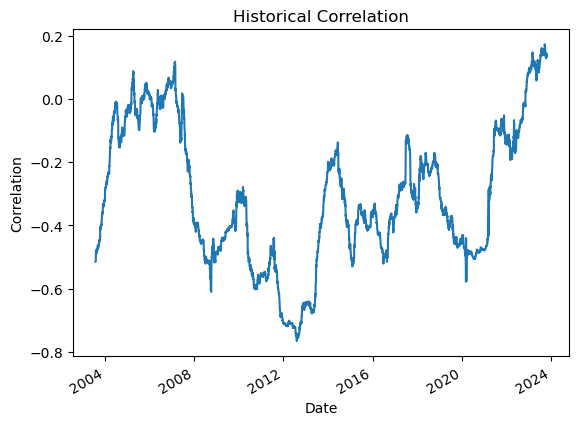

In [40]:
# SPY와 TLT의 수익률
spy_rets = rets['SPY']
tlt_rets = rets['TLT']

# 전체 기간 상관계수 계산
total_corr = spy_rets.corr(tlt_rets)
total_corr

# 1년 단위 롤링 상관계수 계산
corr = spy_rets.rolling(252).corr(tlt_rets)
corr

# 상관계수 시각화
corr.plot()
plt.title('Historical Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')

#### 4. ETF 유니버스 데이터 처리

#### ETF 유니버스

| Ticker | Sector |
| ------ | -----  |
| XLB | 소재 |
| XLE | 에너지 |
| XLF | 금융 |
| XLI | 산업재 |
| XLK | IT |
| XLP | 필수소비재 |
| XLU | 유틸리티 |
| XLV | 헬스케어 |
| XLY | 임의소비재 |

In [41]:
# ETF 유니버스 티커 설정
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# 티커 객체 선언
yfObj = yf.Tickers(tickers)

# 과거 데이터 다운로드
df = yfObj.history(start='2011-01-01', end='2022-10-14')

# 종가를 제외한 나머지 컬럼 삭제
df.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], inplace=True, axis=1)

# NaN 값을 이전 값으로 채워넣기
df.ffill(inplace=True)

# 첫 번째 칼럼 레벨 삭제
df = df.droplevel(0, axis=1)

# 주간 단위로 데이터 재설정
df = df.resample('W').last()

[*********************100%%**********************]  9 of 9 completed


In [42]:
df

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,
2011-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.433306,44.254051,10.377028,27.528273,21.397324,20.648783,20.304173,25.850916,32.034451
2011-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.809774,45.790112,10.696912,28.035748,21.746323,20.862171,20.407036,25.939592,32.221394
2011-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.795626,45.433636,10.530572,28.027943,21.372385,20.975979,20.542065,25.947639,32.136414
2011-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.049170,46.088242,10.396221,27.973291,21.463797,20.613220,20.349180,25.480120,31.524611
2011-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.409052,48.045589,10.626537,28.714977,22.178427,20.840828,20.445625,26.060503,32.467815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.019157,74.794121,32.231316,87.296074,127.204674,69.066399,71.669968,124.903442,156.108826
2022-09-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.041534,67.936821,30.430943,83.328743,122.594727,67.615273,69.529617,120.757195,145.025406
2022-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.630058,69.421249,29.754696,81.450768,117.680641,65.032684,63.473881,119.163231,141.093201


<Axes: xlabel='Date'>

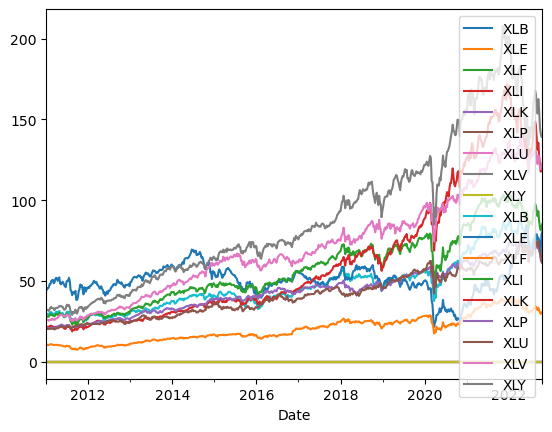

In [43]:
# 역사적 가격 그래프 시각화
df.plot()

<Axes: xlabel='Date'>

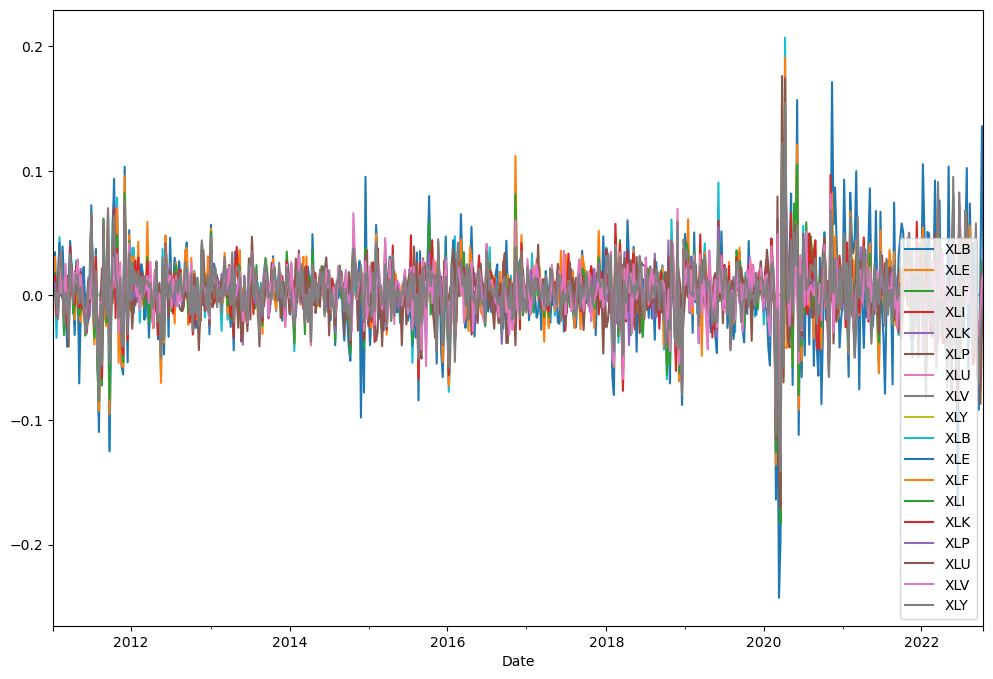

In [44]:
# ETF 수익률 계산
rets = df.pct_change().fillna(0)

# 수익률 시각화
rets.plot(figsize=(12, 8))

<Axes: xlabel='Date'>

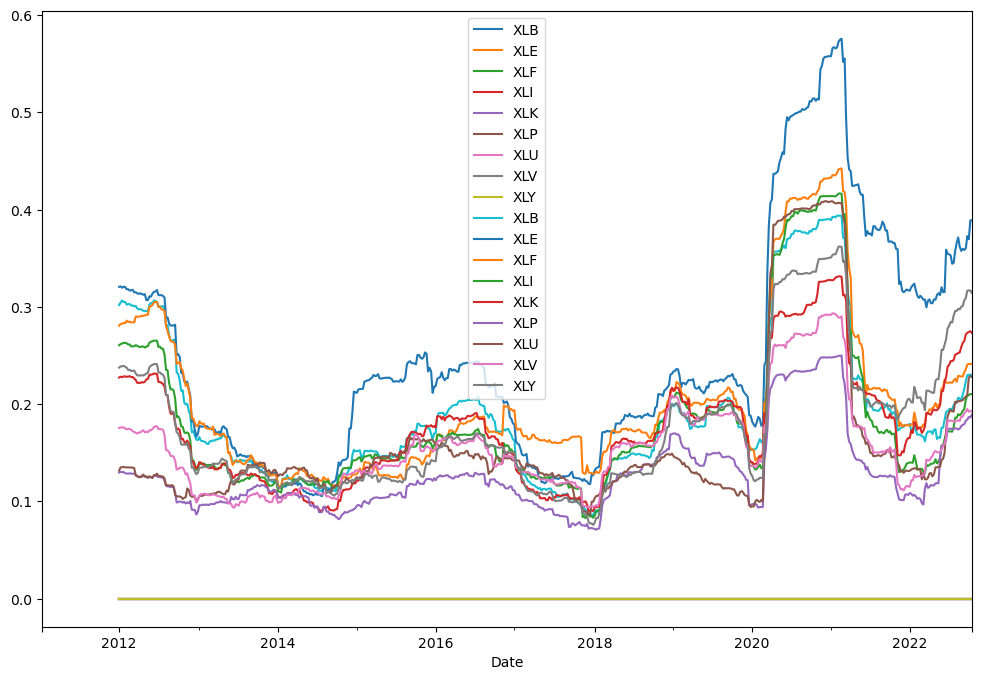

In [45]:
# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(52).std() * np.sqrt(52)

# 변동성 시각화
vols.plot(figsize=(12, 8))

In [46]:
# 전체 기간 ETF 상관계수 계산
corr = rets.corr()
corr

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.719690,0.829266,0.886240,0.737775,0.612623,0.502272,0.684392,0.774423


<Axes: >

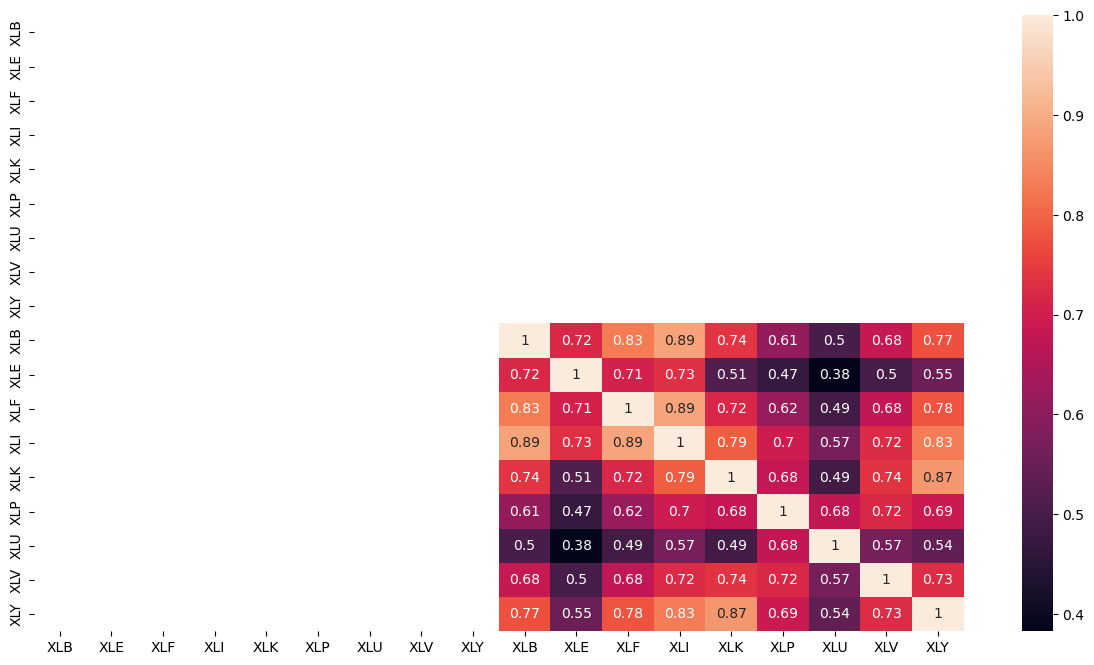

In [47]:
# seaborn 패키지 임포트
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

##### 공분산 행렬 특징 이해하기

In [48]:
# 공분산 계산 및 연율화
cov = rets.cov() * 52
cov

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043178,0.041900,0.037557,0.036560,0.029055,0.017391,0.018630,0.023177,0.031572


In [49]:
# var() 메서드를 사용한 ETF 분산 계산
vols_1 = rets.var() * 52
vols_1

XLB    0.000000
XLE    0.000000
XLF    0.000000
XLI    0.000000
XLK    0.000000
XLP    0.000000
XLU    0.000000
XLV    0.000000
XLY    0.000000
XLB    0.043178
XLE    0.078500
XLF    0.047506
XLI    0.039413
XLK    0.035919
XLP    0.018665
XLU    0.031863
XLV    0.026561
XLY    0.038494
dtype: float64

In [50]:
# 공분산 행렬 및 diag() 메서드를 사용한 ETF 분산 계산
vols_2 = np.diag(cov)
vols_2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04317779,
       0.07850004, 0.0475055 , 0.03941328, 0.03591858, 0.01866471,
       0.03186309, 0.02656078, 0.03849364])

# 주식-채권 배분 모델

### 패키지 임포트

In [51]:
# 패키지 임포트
import numpy as np
import yfinance as yf
import seaborn as sns
sns.set()

### 가격 데이터 다운로드 및 전처리

In [52]:
# 티커
tickers = ['SPY', 'TLT']

# 티커 객체
etf = yf.Tickers(tickers)

# 데이터 다운로드
data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%%**********************]  2 of 2 completed


Close                   High                    Low  \
                   SPY        TLT         SPY        TLT         SPY   
Date                                                                   
2002-08-01   59.265255  40.975040   60.980863  40.984912   58.964859   
2002-08-02   57.936825  41.394634   59.352037  41.518053   57.155790   
2002-08-05   55.920818  41.577305   58.030285  41.685914   55.773961   
2002-08-06   57.803326  41.221870   58.677822  41.419341   56.815352   
2002-08-07   58.811321  41.320599   59.078343  41.537817   57.255924   
...                ...        ...         ...        ...         ...   
2023-10-16  436.040009  86.199997  437.140015  86.370003  433.570007   
2023-10-17  436.019989  85.250000  438.140015  85.629997  432.450012   
2023-10-18  430.209991  84.500000  435.179993  84.720001  429.089996   
2023-10-19  426.429993  82.769997  432.820007  84.570000  425.730011   
2023-10-20  421.190002  83.239998  426.540009  83.540001  421.079987   

                             Open                Volume            
                  TLT         SPY        TLT        SPY       TLT  
Date                                                               
2002-08-01  40.747950   60.667113  40.747950   66571900     25000  
2002-08-02  40.915769   59.078338  41.054001   51772900     52800  
2002-08-05  41.394644   57.736560  41.488443   47191300     61100  
2002-08-06  41.083642   56.895460  41.404532   64730000     64900  
2002-08-07  41.152751   58.657787  41.271232   43289400     40300  
...               ...         ...        ...        ...       ...  
2023-10-16  85.900002  433.820007  86.190002   75433200  38309800  
2023-10-17  84.500000  432.809998  84.889999   75324700  52949100  
2023-10-18  83.849998  434.190002  84.379997   93559800  63724600  
2023-10-19  82.739998  430.950012  83.879997  121323000  87696900  
2023-10-20  82.769997  425.980011  82.989998  123845800  52162600  

[5343 rows x 10 columns]

In [53]:
# 불필요한 칼럼 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data

Close           
                   SPY        TLT
Date                             
2002-08-01   59.265255  40.975040
2002-08-02   57.936825  41.394634
2002-08-05   55.920818  41.577305
2002-08-06   57.803326  41.221870
2002-08-07   58.811321  41.320599
...                ...        ...
2023-10-16  436.040009  86.199997
2023-10-17  436.019989  85.250000
2023-10-18  430.209991  84.500000
2023-10-19  426.429993  82.769997
2023-10-20  421.190002  83.239998

[5343 rows x 2 columns]

In [54]:
# 0 레벨 칼럼 제목 제거
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.265255,40.975040
2002-08-02,57.936825,41.394634
2002-08-05,55.920818,41.577305
2002-08-06,57.803326,41.221870
2002-08-07,58.811321,41.320599
...,...,...
2023-10-16,436.040009,86.199997
2023-10-17,436.019989,85.250000
2023-10-18,430.209991,84.500000


<Axes: xlabel='Date'>

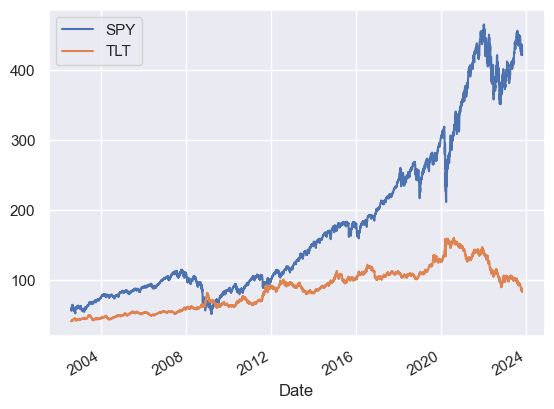

In [55]:
# 가격 그래프
data.plot()

### 일별 수익률 데이터

<Axes: xlabel='Date'>

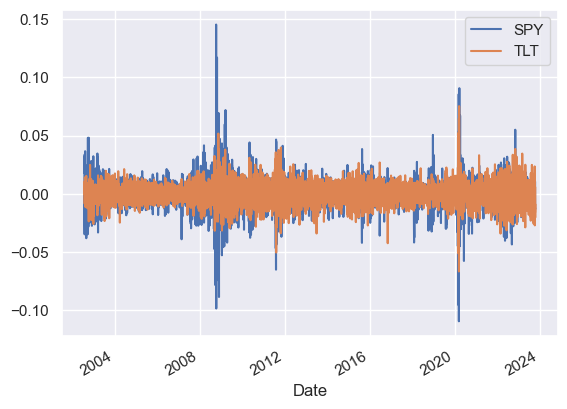

In [56]:
# 일별 수익률 데이터
rets = data.pct_change().fillna(0)

# 수익률 데이터 시각화
rets.plot()

### 개별 자산 평균 수익률과 변동성, 샤프비율

In [57]:
# 주식 기대 수익률과 변동성
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)

# 주식 샤프 비율
stock_sr = stock_mu / stock_sigma

# 채권 기대 수익률과 변동성
bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)

# 채권 샤프 비율
bond_sr = bond_mu / bond_sigma

# 결과 출력
print(stock_sr, bond_sr)

0.5782925599107221 0.3038158064273454


### 60-40 포트폴리오 구현

In [58]:
# 주식 가중치 60%, 채권 가중치 40%
weights = 0.6

In [59]:
# 포트폴리오 수익률
port_ret = weights * rets['SPY'] + (1 - weights) * rets['TLT']

In [60]:
# NaN 값 제거
port_ret.dropna(inplace=True)

In [61]:
# 결과 출력
port_ret

Date
2002-08-01    0.000000
2002-08-02   -0.009353
2002-08-05   -0.019113
2002-08-06    0.016779
2002-08-07    0.011421
                ...   
2023-10-16   -0.000125
2023-10-17   -0.004436
2023-10-18   -0.011514
2023-10-19   -0.013461
2023-10-20   -0.005101
Length: 5343, dtype: float64

<Axes: xlabel='Date'>

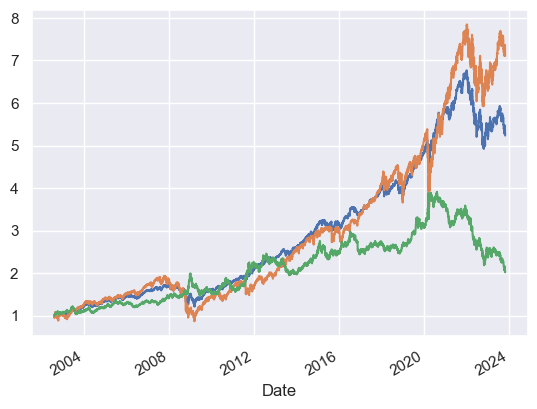

In [62]:
# 그래프 시각화
(1 + port_ret).cumprod().plot()
(1 + rets['SPY']).cumprod().plot()
(1 + rets['TLT']).cumprod().plot()

### 포트폴리오 수익률과 변동성 분석

In [63]:
# 포트폴리오 기대수익률
port_mu = port_ret.mean() * 252

# 포트폴리오 변동성
port_sigma = port_ret.std() * np.sqrt(252)

# 결과 출력
print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

Returns = 0.08408573582321734
Vol = 0.10954326927275333
SR = 0.76760294248523


### 주식-채권 상관계수 분석

In [64]:
# 1년 롤링 상관계수
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])


<Axes: xlabel='Date'>

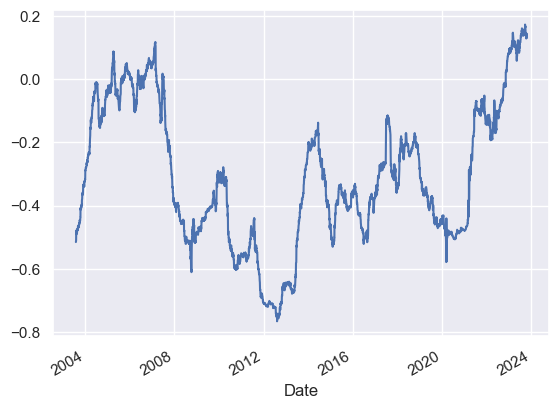

In [65]:
# 롤링 상관계수 시각화
historical_corr.plot()

Copyright 2022. 퀀트대디. All rights reserved.